In [1]:
# Import all libraries in this cell
import requests
import datetime as dt
import re 
import io
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# STAGE 1 -  DATA COLLECTION

The Required Data for analysis is collected by three means as described in the project instructions:

(a) web scrap to obtain data from the NCDC website

(b) import data from the John Hopkins repository

(c) import the provided external data.

(d) import other dataset (optional)

## (a) Web scrap to obtain data from the NCDC website

In [2]:
url = "https://covid19.ncdc.gov.ng/" # the NCDC URL
page = requests.get(url).text # request function to download html content
soup = BeautifulSoup(page, 'lxml') # BeautifulSoup parse the html content 
content_table = soup.find("table", id="custom1") # finds table in the page

print(content_table) # print the table in website, note the poor format of the table.

<table id="custom1">
<thead>
<tr>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
<th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>
</thead>
<tbody>
<tr>
<td>
                                                Lagos
                                            </td>
<td>58,146
                                            </td>
<td>717
                                            </td>
<td>56,990
                                            </td>
<td>439
                                            </td>
</tr>
<tr>
<td>
                                                FCT
                                            </td>
<td>19,747
                                            </td>
<td>494
                                            </td>
<td>19,088
                                            </td>
<td>165
                                            </td>
</tr>
<tr>
<td>
                                                Plateau
                

In [3]:
table_headers = content_table.thead.findAll("tr") # to find the row in the head portion of table
for k in range(len(table_headers)): # iterating through the row 
    data = table_headers[k].find_all("th") # finds the columns in table head within row 
    column_names = [j.string.strip() for j in data] # 
    
print(column_names) # print column names in the row of table head

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [4]:
table_data = content_table.tbody.findAll('tr') # to find all the row in the body portion of table

values = []  # a list container
keys = [] # another list container

for k in range(len(table_data)): # iterating through the row in the body portion of table
    key = table_data[k].find_all("td")[0].string.strip() # returns the value of the zero index (first column) in k row as key
    keys.append(key) # appends key it to the list
    value = [j.string.strip() for j in table_data[k].find_all("td")] # returns the value of all columns in k rows
    values.append(value) # appends value to the list
    
print(keys, '\n', '\n', values) # print keys and values  

['Lagos', 'FCT', 'Plateau', 'Kaduna', 'Rivers', 'Oyo', 'Edo', 'Ogun', 'Kano', 'Ondo', 'Kwara', 'Delta', 'Osun', 'Nasarawa', 'Enugu', 'Katsina', 'Gombe', 'Ebonyi', 'Anambra', 'Akwa Ibom', 'Abia', 'Imo', 'Bauchi', 'Borno', 'Benue', 'Adamawa', 'Niger', 'Taraba', 'Bayelsa', 'Ekiti', 'Sokoto', 'Jigawa', 'Kebbi', 'Cross River', 'Yobe', 'Zamfara', 'Kogi'] 
 
 [['Lagos', '58,146', '717', '56,990', '439'], ['FCT', '19,747', '494', '19,088', '165'], ['Plateau', '9,046', '7', '8,982', '57'], ['Kaduna', '9,030', '49', '8,916', '65'], ['Rivers', '7,060', '56', '6,903', '101'], ['Oyo', '6,840', '211', '6,506', '123'], ['Edo', '4,897', '5', '4,707', '185'], ['Ogun', '4,639', '19', '4,571', '49'], ['Kano', '3,944', '20', '3,814', '110'], ['Ondo', '3,242', '1,099', '2,080', '63'], ['Kwara', '3,120', '251', '2,814', '55'], ['Delta', '2,617', '802', '1,744', '71'], ['Osun', '2,574', '34', '2,488', '52'], ['Nasarawa', '2,380', '1,994', '373', '13'], ['Enugu', '2,281', '239', '2,013', '29'], ['Katsina', '2

In [5]:
dataframe_dict = dict(enumerate(values)) # enumerates the value lists and convert it to a dictionary data type
print(dataframe_dict) # prints the dictionary data

{0: ['Lagos', '58,146', '717', '56,990', '439'], 1: ['FCT', '19,747', '494', '19,088', '165'], 2: ['Plateau', '9,046', '7', '8,982', '57'], 3: ['Kaduna', '9,030', '49', '8,916', '65'], 4: ['Rivers', '7,060', '56', '6,903', '101'], 5: ['Oyo', '6,840', '211', '6,506', '123'], 6: ['Edo', '4,897', '5', '4,707', '185'], 7: ['Ogun', '4,639', '19', '4,571', '49'], 8: ['Kano', '3,944', '20', '3,814', '110'], 9: ['Ondo', '3,242', '1,099', '2,080', '63'], 10: ['Kwara', '3,120', '251', '2,814', '55'], 11: ['Delta', '2,617', '802', '1,744', '71'], 12: ['Osun', '2,574', '34', '2,488', '52'], 13: ['Nasarawa', '2,380', '1,994', '373', '13'], 14: ['Enugu', '2,281', '239', '2,013', '29'], 15: ['Katsina', '2,097', '14', '2,049', '34'], 16: ['Gombe', '2,034', '4', '1,986', '44'], 17: ['Ebonyi', '2,030', '33', '1,965', '32'], 18: ['Anambra', '1,909', '64', '1,826', '19'], 19: ['Akwa Ibom', '1,843', '90', '1,739', '14'], 20: ['Abia', '1,683', '10', '1,651', '22'], 21: ['Imo', '1,655', '26', '1,592', '37'],

In [6]:
pandas_df = pd.DataFrame(dataframe_dict) # converts dictionary datatype to dataframe.
print(pandas_df) # prints the dataframe

       0       1        2       3       4      5      6      7      8      9   \
0   Lagos     FCT  Plateau  Kaduna  Rivers    Oyo    Edo   Ogun   Kano   Ondo   
1  58,146  19,747    9,046   9,030   7,060  6,840  4,897  4,639  3,944  3,242   
2     717     494        7      49      56    211      5     19     20  1,099   
3  56,990  19,088    8,982   8,916   6,903  6,506  4,707  4,571  3,814  2,080   
4     439     165       57      65     101    123    185     49    110     63   

   ...      27       28     29      30      31     32           33    34  \
0  ...  Taraba  Bayelsa  Ekiti  Sokoto  Jigawa  Kebbi  Cross River  Yobe   
1  ...     910      885    869     775     527    450          394   371   
2  ...      24       25     11       1      26     42            4    32   
3  ...     864      834    847     746     485    392          372   330   
4  ...      22       26     11      28      16     16           18     9   

        35    36  
0  Zamfara  Kogi  
1      240     5  

In [7]:
df = pandas_df.T # Transpose the dataframe
print (df) # prints the Transposed dataframe

              0       1      2       3    4
0         Lagos  58,146    717  56,990  439
1           FCT  19,747    494  19,088  165
2       Plateau   9,046      7   8,982   57
3        Kaduna   9,030     49   8,916   65
4        Rivers   7,060     56   6,903  101
5           Oyo   6,840    211   6,506  123
6           Edo   4,897      5   4,707  185
7          Ogun   4,639     19   4,571   49
8          Kano   3,944     20   3,814  110
9          Ondo   3,242  1,099   2,080   63
10        Kwara   3,120    251   2,814   55
11        Delta   2,617    802   1,744   71
12         Osun   2,574     34   2,488   52
13     Nasarawa   2,380  1,994     373   13
14        Enugu   2,281    239   2,013   29
15      Katsina   2,097     14   2,049   34
16        Gombe   2,034      4   1,986   44
17       Ebonyi   2,030     33   1,965   32
18      Anambra   1,909     64   1,826   19
19    Akwa Ibom   1,843     90   1,739   14
20         Abia   1,683     10   1,651   22
21          Imo   1,655     26  

In [8]:
df.columns=column_names # set the columns name in dataframe 

In [9]:
covid_ncdc = df # rename the dataframe as covid_NCDC
covid_ncdc.head() # Prints the first 5 rows of dataframe

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,146",717,"56,990",439
1,FCT,"19,747",494,"19,088",165
2,Plateau,"9,046",7,"8,982",57
3,Kaduna,"9,030",49,"8,916",65
4,Rivers,"7,060",56,"6,903",101


## (b) import data from the John Hopkins repository

To import data from the John Hopkins GitHub repository, the links is shown below. 

* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [10]:
# Import data from Github repository

global_cc=pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
global_rc=pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
global_dc=pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


### C - Import Provided External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [11]:
covid_ext = pd.read_csv('C:/Users/BOSS/covid_external.csv')
budget_data = pd.read_csv('C:/Users/BOSS/Budget_data.csv')
realgdp = pd.read_csv('C:/Users/BOSS/RealGDP.csv')
covidnig = pd.read_csv('C:/Users/BOSS/covidnig.csv')

### d - Additional DataFrame

In [12]:
state_revenue_1=pd.read_csv('State_revenue_Q1.csv')
state_revenue_2=pd.read_csv('State_revenue_Q2.csv')

## View all imported Data 

I will obtain basic information about the data using the `head()` and `info()` method.

In [13]:
covid_ncdc.info()
covid_ncdc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 3.0+ KB


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,146",717,"56,990",439
1,FCT,"19,747",494,"19,088",165
2,Plateau,"9,046",7,"8,982",57
3,Kaduna,"9,030",49,"8,916",65
4,Rivers,"7,060",56,"6,903",101


In [14]:
global_cc.info()
global_cc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 458 entries, Province/State to 4/19/21
dtypes: float64(2), int64(454), object(2)
memory usage: 980.5+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,57144,57160,57242,57364,57492,57534,57612,57721,57793,57898
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,128155,128393,128518,128752,128959,129128,129307,129456,129594,129694
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,118378,118516,118645,118799,118975,119142,119323,119486,119642,119805
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12497,12545,12581,12614,12641,12641,12712,12771,12805,12805
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23331,23457,23549,23697,23841,23951,24122,24300,24389,24518


In [15]:
global_rc.info()
global_rc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Columns: 458 entries, Province/State to 4/19/21
dtypes: float64(2), int64(454), object(2)
memory usage: 926.9+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,51962,51989,52005,52013,52022,52083,52105,52116,52168,52244
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,97206,97723,98269,98903,99441,100013,100600,101142,101584,102171
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,82493,82600,82704,82813,82929,83048,83169,83286,83397,83514
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11770,11825,11890,11932,11989,11989,12105,12159,12203,12203
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21890,22058,22093,22115,22144,22175,22203,22576,22597,22600


In [16]:
global_dc.info()
global_dc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 458 entries, Province/State to 4/19/21
dtypes: float64(2), int64(454), object(2)
memory usage: 980.5+ KB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2521,2521,2529,2529,2532,2533,2535,2539,2539,2546
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2310,2317,2321,2326,2331,2335,2337,2340,2342,2347
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3126,3130,3134,3137,3141,3144,3148,3152,3155,3160
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,120,120,121,121,121,121,123,123,123,123
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,550,553,554,554,557,557,560,561,561,563


In [17]:
covid_ext.info()
covid_ext.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [18]:
budget_data.info()
budget_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [19]:
covidnig.info()
covidnig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [20]:
realgdp.info()
realgdp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [21]:
state_revenue_1.info()
state_revenue_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STATE              37 non-null     object
 1   PAYE               37 non-null     object
 2   DIRECT ASSESSMENT  37 non-null     object
 3   ROAD TAXES         37 non-null     object
 4   OTHER TAXES        37 non-null     object
 5   TOTAL TAX          37 non-null     object
 6   MDAs REVENUE       37 non-null     object
 7   GRAND TOTAL        37 non-null     object
dtypes: object(8)
memory usage: 2.4+ KB


,STATE,PAYE,DIRECT ASSESSMENT,ROAD TAXES,OTHER TAXES,TOTAL TAX,MDAs REVENUE,GRAND TOTAL
0,Abia,"2,240,315,057.64","85,519,703.27","96,089,570.00","1,014,578,796.89","3,436,503,127.80","828,586,854.50","4,265,089,982.30"
1,Adamawa,"1,019,327,831.49","16,968,320.47","111,856,997.21","143,923,541.06","1,292,076,690.23","334,177,425.36","1,626,254,115.59"
2,Akwa Ibom,"10,768,359,908.24","42,350,101.20","89,148,325.00","283,360,808.82","11,183,219,143.26","771,209,243.17","11,954,428,386.43"
3,Anambra,"1,505,286,766.23","169,023,826.08","210,941,300.00","644,202,415.99","2,529,454,308.30","2,003,929,152.49","4,533,383,460.79"
4,Bauchi,"4,230,618,187.42","7,061,460.49","19,573,044.53","89,440,739.16","4,346,693,431.60","38,347,533.49","4,385,040,965.09"


In [22]:
state_revenue_2.info()
state_revenue_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   STATE              37 non-null     object
 1   PAYE               37 non-null     object
 2   DIRECT ASSESSMENT  37 non-null     object
 3   ROAD TAXES         37 non-null     object
 4   OTHER TAXES        37 non-null     object
 5   TOTAL TAX          37 non-null     object
 6   MDAs REVENUE       37 non-null     object
 7   GRAND TOTAL        37 non-null     object
dtypes: object(8)
memory usage: 2.4+ KB


,STATE,PAYE,DIRECT ASSESSMENT,ROAD TAXES,OTHER TAXES,TOTAL TAX,MDAs REVENUE,GRAND TOTAL
0,Abia,"1,437,340,691.12","20,169,757.09","22,200,000.00","323,755,837.46","1,803,466,285.67","120,159,444.13","1,923,625,729.80"
1,Adamawa,"1,514,005,135.80","9,219,220.00","23,925,999.00","215,205,182.84","1,762,355,537.64","361,786,745.35","2,124,142,282.99"
2,Akwa Ibom,"2,966,824,783.58","13,205,513.05","47,877,625.00","944,148,973.19","3,972,056,894.82","284,509,027.02","4,256,565,921.84"
3,Anambra,"3,194,092,342.56","132,594,695.40","139,166,075.00","662,816,246.23","4,128,669,359.19","884,659,362.71","5,013,328,721.90"
4,Bauchi,"1,255,073,415.24","29,844,003.09","15,354,925.00","56,311,708.24","1,356,584,051.57","10,662,741.06","1,367,246,792.63"


# STAGE 2 - Data Cleaning and Preparation
From the information obtained after viewing data, i will need to clean the data. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data
* remove unwanted columns in state revenue data and rename column

### TO DO A- Cleaning Scrapped Data

In [23]:
# rename the columns in scrapped dataframe
covid_ncdc=covid_ncdc.rename(columns={'States Affected': 'States'})

budget_data=budget_data.rename(columns={'states':'States'})

covid_ext=covid_ext.rename(columns={'states':'States'})

In [24]:
budget_data.States[(budget_data.States == 'Akwa-Ibom')] = 'Akwa Ibom'
covid_ext.States[(covid_ext.States == 'Nassarawa')] = 'Nasarawa'
covid_ext.States[(covid_ext.States == 'Cross river')] = 'Cross River'

In [25]:
# Remove comma (,) in numerical data of scrapped data

covid_ncdc['No. of Cases (Lab Confirmed)'] = covid_ncdc['No. of Cases (Lab Confirmed)'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

covid_ncdc['No. of Cases (on admission)'] = covid_ncdc['No. of Cases (on admission)'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

covid_ncdc['No. Discharged'] = covid_ncdc['No. Discharged'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

covid_ncdc['No. of Deaths'] = covid_ncdc['No. of Deaths'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

covid_ncdc.head()

,States,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,58146,717,56990,439
1,FCT,19747,494,19088,165
2,Plateau,9046,7,8982,57
3,Kaduna,9030,49,8916,65
4,Rivers,7060,56,6903,101


### TO DO B- 

Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [26]:
# Extract Nigeria data from global data and drop other columns like Lat, Long, Province/State and Country/Region
nig_daily_cc = global_cc[(global_cc['Country/Region'] == 'Nigeria')].drop(columns=['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1)

#Transpose the dataframe
nig_daily_cc=nig_daily_cc.T

# reset the index column
nig_daily_cc=nig_daily_cc.reset_index()

# rename the columns
nig_daily_cc=nig_daily_cc.rename(columns={'index':'Date', 199:'Cases Confirmed'})

# format the Date column to datetime
nig_daily_cc['Date'] = pd.to_datetime(nig_daily_cc['Date'])

# view the tail of the dataframe
nig_daily_cc.tail()

,Date,Cases Confirmed
449,2021-04-15,164080
450,2021-04-16,164147
451,2021-04-17,164207
452,2021-04-18,164233
453,2021-04-19,164303


### TODO C -
Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [27]:
# Extract Nigeria data from global data and drop other columns like Lat, Long, Province/State and Country/Region
nig_daily_rc = global_rc[(global_rc['Country/Region'] == 'Nigeria')].drop(columns=['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1)

# Transpose the dataframe
nig_daily_rc=nig_daily_rc.T

# reset the index column
nig_daily_rc=nig_daily_rc.reset_index()

# rename the columns
nig_daily_rc=nig_daily_rc.rename(columns={'index':'Date', 184:'Recovered Cases'})

# format the Date column to datetime
nig_daily_rc['Date']=pd.to_datetime(nig_daily_rc['Date'])

# view the head of the dataframe
nig_daily_rc.head()

,Date,Recovered Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


### TODO D - 

Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [28]:
# Extract Nigeria data from global data and drop other columns like Lat, Long, Province/State and Country/Region
nig_daily_dc = global_dc[(global_dc['Country/Region'] == 'Nigeria')].drop(columns=['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1)

# Transpose the dataframe
nig_daily_dc=nig_daily_dc.T

# reset the index column
nig_daily_dc=nig_daily_dc.reset_index()

# rename the columns
nig_daily_dc=nig_daily_dc.rename(columns={'index':'Date', 199:'Death Cases'})

# format the Date column to datetime
nig_daily_dc['Date']=pd.to_datetime(nig_daily_dc['Date'])

# view the dataframe
nig_daily_dc.head()

,Date,Death Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


### TO DO E-

i will Remove unwanated columns in state revenue data, rename columns, merge both together as one dataframe and remove comma from numerical values in the data

In [29]:
# drop unwanted columns in state revenue 1
del state_revenue_1['PAYE']
del state_revenue_1['DIRECT ASSESSMENT']
del state_revenue_1['ROAD TAXES']
del state_revenue_1['OTHER TAXES']
del state_revenue_1['TOTAL TAX']
del state_revenue_1['MDAs REVENUE']

In [30]:
# rename the column
state_revenue_1=state_revenue_1.rename(columns={'GRAND TOTAL': 'Q1'})
state_revenue_1.head()

,STATE,Q1
0,Abia,"4,265,089,982.30"
1,Adamawa,"1,626,254,115.59"
2,Akwa Ibom,"11,954,428,386.43"
3,Anambra,"4,533,383,460.79"
4,Bauchi,"4,385,040,965.09"


In [31]:
# drop unwanted columns in state revenue 2
del state_revenue_2['PAYE']
del state_revenue_2['DIRECT ASSESSMENT']
del state_revenue_2['ROAD TAXES']
del state_revenue_2['OTHER TAXES']
del state_revenue_2['TOTAL TAX']
del state_revenue_2['MDAs REVENUE']

In [32]:
# rename the column
state_revenue_2=state_revenue_2.rename(columns={'GRAND TOTAL': 'Q2'})
state_revenue_2.head()

,STATE,Q2
0,Abia,"1,923,625,729.80"
1,Adamawa,"2,124,142,282.99"
2,Akwa Ibom,"4,256,565,921.84"
3,Anambra,"5,013,328,721.90"
4,Bauchi,"1,367,246,792.63"


In [33]:
# merge both data
state_revenue_2020=state_revenue_1.merge(state_revenue_2, on=['STATE'], how='inner')

In [34]:
state_revenue_2020.head()

,STATE,Q1,Q2
0,Abia,"4,265,089,982.30","1,923,625,729.80"
1,Adamawa,"1,626,254,115.59","2,124,142,282.99"
2,Akwa Ibom,"11,954,428,386.43","4,256,565,921.84"
3,Anambra,"4,533,383,460.79","5,013,328,721.90"
4,Bauchi,"4,385,040,965.09","1,367,246,792.63"


In [35]:
# Remove comma (,) in numerical data 

state_revenue_2020['Q1'] = state_revenue_2020['Q1'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

state_revenue_2020['Q2'] = state_revenue_2020['Q2'].apply(lambda x: int(re.sub("[^0-9]", "", x)))

In [36]:
state_revenue_2020.head()

,STATE,Q1,Q2
0,Abia,426508998230,192362572980
1,Adamawa,162625411559,212414228299
2,Akwa Ibom,1195442838643,425656592184
3,Anambra,453338346079,501332872190
4,Bauchi,438504096509,136724679263


# STEP 3 - ANALYSIS

Here, I will perform some analyses on the datasets and communicate my findings in charts and summary.


### TO DO A-

I will determine from the covid_NCDC scrapped dataframe the total number of Laboratory confirmed cases, total number of discharged cases, No. of Cases (on admission) and and total number of death cases.

I will then plot it as a bar plot.

I will also determine the percentage of recoveries from Covid-19.

   No. of Cases (Lab Confirmed)  No. Discharged  No. of Cases (on admission)  \
0                        164303          154384                         7858   

   No. of Deaths  
0           2061  


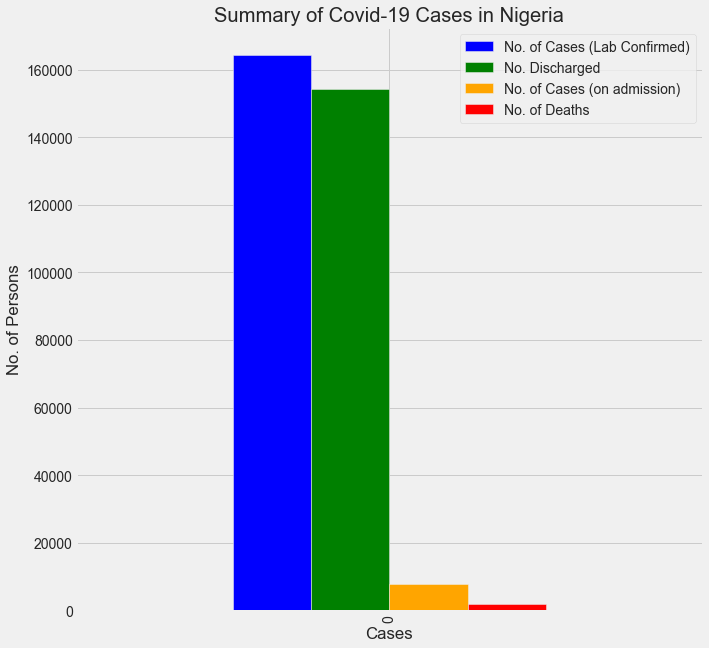

In [37]:
a=covid_ncdc['No. of Cases (Lab Confirmed)'].sum()
b=covid_ncdc['No. Discharged'].sum()
c=covid_ncdc['No. of Cases (on admission)'].sum() 
d=covid_ncdc['No. of Deaths'].sum()


dic = {'No. of Cases (Lab Confirmed)': a,
       'No. Discharged': b,
       'No. of Cases (on admission)': c,
       'No. of Deaths': d}

dic_df=pd.DataFrame(dic, index=[0])


print(dic_df)
dic_df.plot.bar(figsize=(10,10), color= {'No. of Cases (Lab Confirmed)': 'blue',
       'No. Discharged': 'green',
       'No. of Cases (on admission)': 'orange',
       'No. of Deaths': 'red'})
plt.xlabel('Cases')
plt.ylabel('No. of Persons')
plt.title('Summary of Covid-19 Cases in Nigeria')
plt.legend()
plt.show()



In [38]:
percentage_recovery =  (dic_df['No. Discharged'])  / (dic_df['No. of Cases (Lab Confirmed)'] + dic_df['No. of Cases (on admission)'] + dic_df['No. of Deaths'])  * 100

In [39]:
print('The total percentage of recoveries from Covid-19 in Nigeria is', percentage_recovery[0], 'percent')

The total percentage of recoveries from Covid-19 in Nigeria is 88.61337833339074 percent


### TO DO B-

I will Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

Text(0, 0.5, 'No. of Persons')

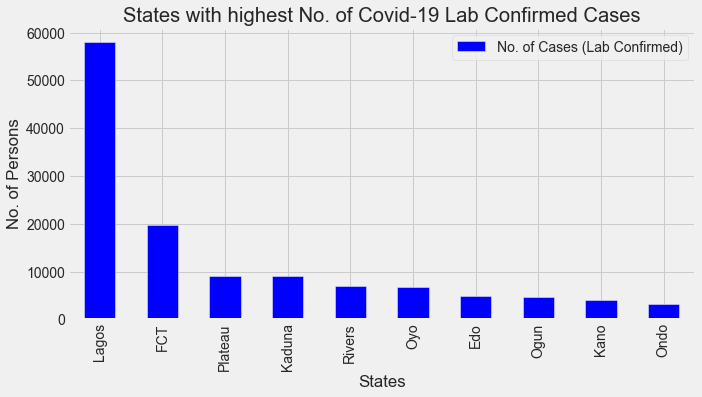

In [40]:
covid_ncdc.head(10).plot.bar(x='States', y='No. of Cases (Lab Confirmed)', figsize=(10,5), color='blue')
plt.title('States with highest No. of Covid-19 Lab Confirmed Cases')
plt.ylabel('No. of Persons')

### TODO C - 

I will Generate a plot that shows the Top 10 states in terms of Discharged Covid cases.

Text(0, 0.5, 'No. of Persons')

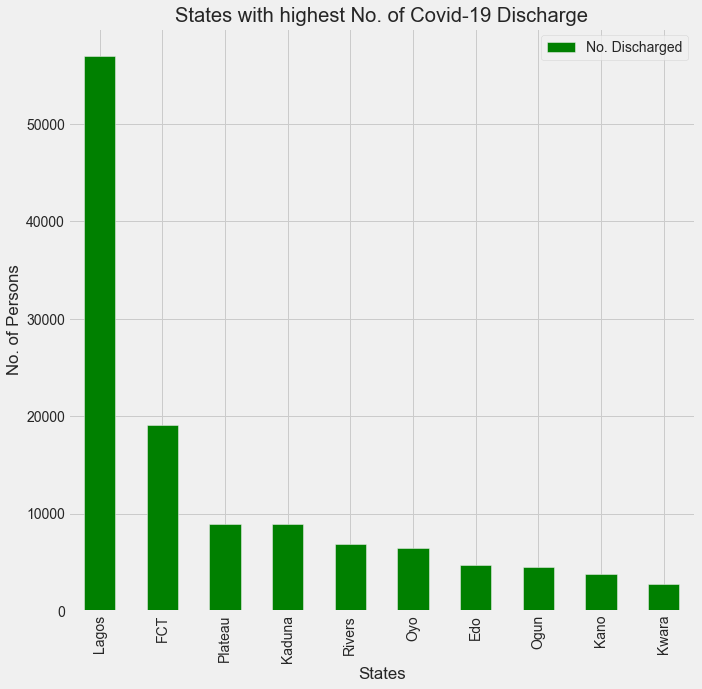

In [41]:
covid_ncdc.sort_values(by=['No. Discharged'], inplace=True, ascending=False)
covid_ncdc.head(10).plot.bar(x='States', y='No. Discharged', figsize=(10,10), color='green')
plt.title('States with highest No. of Covid-19 Discharge')
plt.ylabel('No. of Persons')

### TODO D-

I will Generate a plot that shows the top 10 states in terms of Death cases 

Text(0, 0.5, 'No. of Persons')

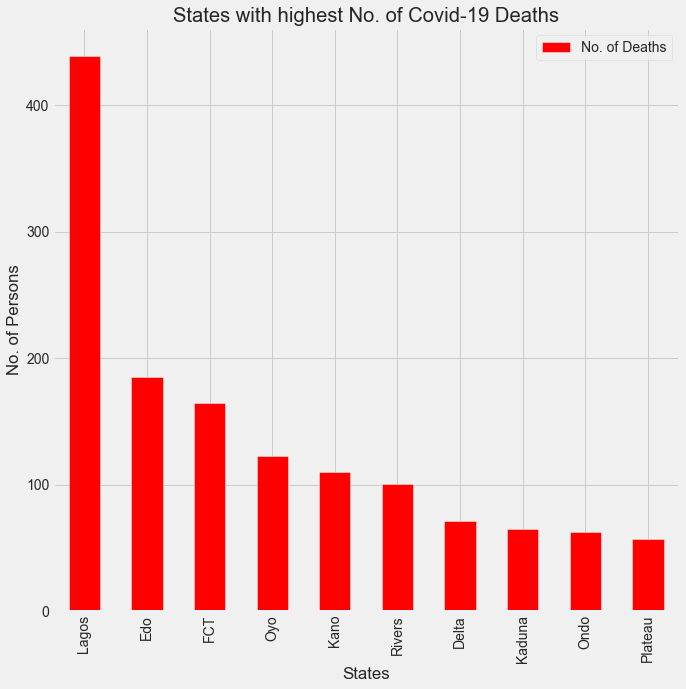

In [42]:
covid_ncdc.sort_values(by=['No. of Deaths'], inplace=True, ascending=False,)
covid_ncdc.head(10).plot.bar(x='States', y='No. of Deaths', figsize=(10,10), color='red')
plt.title('States with highest No. of Covid-19 Deaths')
plt.ylabel('No. of Persons')

### TODO E-

* I will Determine the daily infection rate for Nigeria
* Generate a line plot for the above

In [43]:
nig_daily_diff=nig_daily_cc.diff()

# rename columns in new dataframe 
nig_daily_diff=nig_daily_diff.rename(columns={'Date':'Time Diff', 'Cases Confirmed': 'Daily Cases Confirmed'})

#compute the mean Daily cases confirmed 
daily_infection_rate=nig_daily_diff['Daily Cases Confirmed'].mean()

print('The Daily infection rate is', daily_infection_rate, 'Persons per day')

The Daily infection rate is 362.6997792494481 Persons per day


Text(0, 0.5, 'No. of Persons')

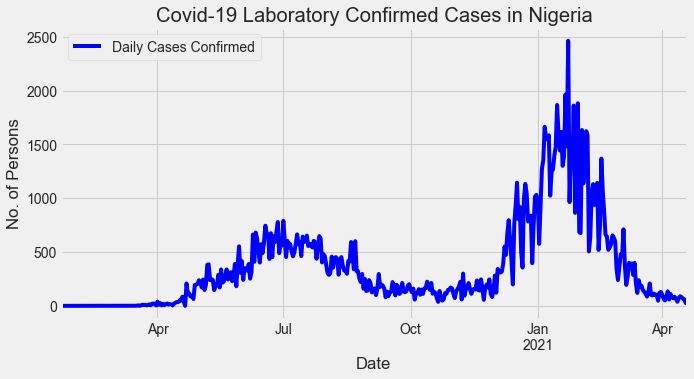

In [44]:
# concatenate the two dataframes 
nigconfirmed_cases=pd.concat([nig_daily_cc, nig_daily_diff], axis=1)

# plot the Daily Cases Confirmed against the Date
nigconfirmed_cases.plot.line(y='Daily Cases Confirmed', x='Date', color='blue', figsize=(10,5))
plt.title('Covid-19 Laboratory Confirmed Cases in Nigeria')
plt.ylabel('No. of Persons')

### TODO F - 

I will Calculate maximum infection rate for a day (Number of new cases) and the date of occurence

In [45]:
# maximum number of new cases confirmed in a day
nigconfirmed_max=nigconfirmed_cases['Daily Cases Confirmed'].max()
print('The maximum number of daily confirmed cases is', nigconfirmed_max, 'Persons')

# date of maximum occurence
nigconfirmed_cases[nigconfirmed_cases['Daily Cases Confirmed']==nigconfirmed_max].Date

The maximum number of daily confirmed cases is 2464.0 Persons


367   2021-01-23
Name: Date, dtype: datetime64[ns]

### TODO G-

I will Calculate the maximum recovery rate (No recovered per day) and the date of occurence

In [46]:
nig_daily_rc_diff=nig_daily_rc.diff()

# rename columns in new dataframe 
nig_daily_rc_diff=nig_daily_rc_diff.rename(columns={'Date':'Time Diff', 'Recovered Cases': 'Daily Recovered Cases'})

#compute the mean Daily  recovered cases  
daily_recovery_rate=nig_daily_rc_diff['Daily Recovered Cases'].mean()

print('The Daily recovery rate is', daily_recovery_rate, 'Persons per day')

The Daily recovery rate is 340.80353200883 Persons per day


In [47]:
# concatenate the two dataframes 
nigrecovered_cases=pd.concat([nig_daily_rc, nig_daily_rc_diff], axis=1)

# max number of recovery in a day
nigrecovered_max=nigrecovered_cases['Daily Recovered Cases'].max()
print('The maximum number of recovery per day is ', nigrecovered_max, 'Persons')

# Date of maximum number of recovery
nigrecovered_cases[nigrecovered_cases['Daily Recovered Cases']==nigrecovered_max].Date

The maximum number of recovery per day is  11188.0 Persons


195   2020-08-04
Name: Date, dtype: datetime64[ns]

### TODO H -

I will Calculate the maximum death rate (No of Deaths per day) and the date of occurence

I will Generate a line plot for the above


In [48]:
nig_daily_dc_diff=nig_daily_dc.diff()

#rename columns in new dataframe 
nig_daily_dc_diff=nig_daily_dc_diff.rename(columns={'Date':'Time Diff', 'Death Cases':'Daily Death Cases'})

# compute the mean Daily Death Cases
daily_death_rate=nig_daily_dc_diff['Daily Death Cases'].mean()

print('The Daily Death rate is', daily_death_rate, 'Persons per day')

The Daily Death rate is 4.549668874172186 Persons per day


In [49]:
# concatenate the two dataframes
nigdeath_cases=pd.concat([nig_daily_dc, nig_daily_dc_diff], axis=1)

# maximum number of deaths in a day
nig_max_death=nigdeath_cases['Daily Death Cases'].max()
print('The maximum number of daily death is', nig_max_death, 'Persons')

# the date of occurence of max death
nigdeath_cases[nigdeath_cases['Daily Death Cases']==nig_max_death].Date

The maximum number of daily death is 31.0 Persons


146   2020-06-16
Name: Date, dtype: datetime64[ns]

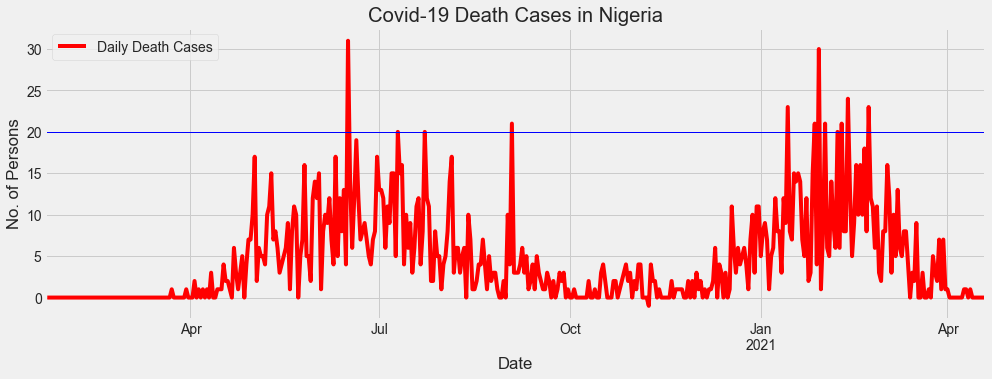

In [50]:
# line plot of Daily Death Cases against Date
nigdeath_cases.plot.line(x='Date', y='Daily Death Cases', color='red', figsize=(15, 5))
plt.ylabel('No. of Persons')
plt.title('Covid-19 Death Cases in Nigeria')
plt.axhline(y=20, xmin=0, xmax=2021, linewidth=1, color='b')

### TODO I - 

a. I will Determine the relationship between the external dataset and the NCDC COVID-19 data

       i. relationship between No. of Lab Confirmed Cases and Overall CCVI
       ii. No. of Death cases and Overall CCVI 

b. I will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis.

c. I will generate a line plot of top 10 Death cases and the overall community vulnerability index on the same axis

In [51]:
# merge external covid_NCDC with external dataset(covid_ext)
nig_covid_ext=pd.merge(covid_ncdc, covid_ext, how='inner', on=['States'])

# view the merged data
nig_covid_ext

,States,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,58146,717,56990,439,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,Edo,4897,5,4707,185,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
2,FCT,19747,494,19088,165,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
3,Oyo,6840,211,6506,123,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
4,Kano,3944,20,3814,110,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87
5,Rivers,7060,56,6903,101,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
6,Delta,2617,802,1744,71,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
7,Kaduna,9030,49,8916,65,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
8,Ondo,3242,1099,2080,63,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
9,Plateau,9046,7,8982,57,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [52]:
nig_covid_ext.describe()

,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
count,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,37.000000
mean,4440.621622,212.378378,4172.540541,55.702703,5.843892e+06,0.502703,0.502703,0.500000,0.502703,0.502703,0.5,0.502703,0.502703,0.954054
std,9780.341963,408.972585,9622.702129,77.374940,2.622344e+06,0.301373,0.301373,0.299073,0.301373,0.301373,0.3,0.301373,0.301373,0.100539
min,5.000000,0.000000,3.000000,2.000000,2.606000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.790000
25%,910.000000,11.000000,746.000000,17.000000,4.272000e+06,0.300000,0.300000,0.300000,0.300000,0.300000,0.3,0.300000,0.300000,0.870000
50%,1909.000000,32.000000,1739.000000,32.000000,5.185000e+06,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.500000,0.930000
75%,3242.000000,211.000000,2814.000000,57.000000,6.376000e+06,0.800000,0.800000,0.700000,0.800000,0.800000,0.8,0.800000,0.800000,1.040000
max,58146.000000,1994.000000,56990.000000,439.000000,1.472600e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.140000


#### Observations from described data
presence of outliers in 
* No. of Cases (Lab Confirmed)	
* No. of Cases (on admission)	
* No. Discharged	No. of Deaths	

presence of outliers is indicated by 
* the large difference between the mean and 50th percentile 
* the large difference between the 75th percentile and Max.
* the large standard deviation (std)

#### Outlier Treatment

In [53]:
# OUTLIER TREATMENT in No. of Lab confirmed cases

print(np.percentile(nig_covid_ext['No. of Cases (Lab Confirmed)'], [75])) # returs the 75th percentile value as an array

print(np.percentile(nig_covid_ext['No. of Cases (Lab Confirmed)'], [75])[0]) # returns the 75th percentile value 

uv=np.percentile(nig_covid_ext['No. of Cases (Lab Confirmed)'], [75])[0] # save the 75th percentile value as uv

nig_covid_ext[(nig_covid_ext['No. of Cases (Lab Confirmed)'] > 3*uv)] # returns a df for values greater than 3*uv

nig_covid_ext['No. of Cases (Lab Confirmed)'][(nig_covid_ext['No. of Cases (Lab Confirmed)'] > 3*uv)] = 3*uv # set their value as 3*uv

[3242.]
3242.0


In [54]:
nig_covid_ext.head()

,States,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,9726,717,56990,439,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,Edo,4897,5,4707,185,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
2,FCT,9726,494,19088,165,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
3,Oyo,6840,211,6506,123,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
4,Kano,3944,20,3814,110,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


In [55]:
# OUTLIER TREATMENT in No. of Death Cases

print(np.percentile(nig_covid_ext['No. of Deaths'], [75])) # returs the 75th percentile value as an array

print(np.percentile(nig_covid_ext['No. of Deaths'], [75])[0]) # returns the 75th percentile value 

uv=np.percentile(nig_covid_ext['No. of Deaths'], [75])[0] # save the 75th percentile value as uv

nig_covid_ext[(nig_covid_ext['No. of Deaths'] > 3*uv)] # returns a df for values greater than 3*uv

nig_covid_ext['No. of Deaths'][(nig_covid_ext['No. of Deaths'] > 3*uv)] = 3*uv # set their value as 3*uv

[57.]
57.0


In [56]:
nig_covid_ext.head()

,States,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,9726,717,56990,171,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,Edo,4897,5,4707,171,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
2,FCT,9726,494,19088,165,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
3,Oyo,6840,211,6506,123,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
4,Kano,3944,20,3814,110,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


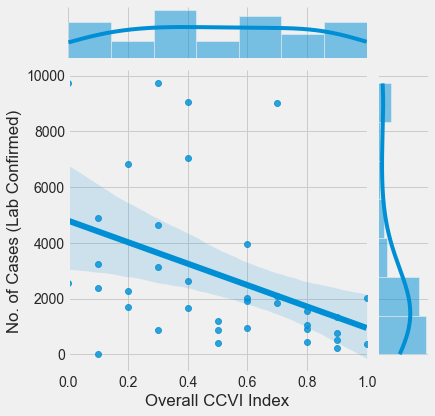

In [57]:
sns.jointplot(x='Overall CCVI Index', y='No. of Cases (Lab Confirmed)', data=nig_covid_ext, kind='reg')

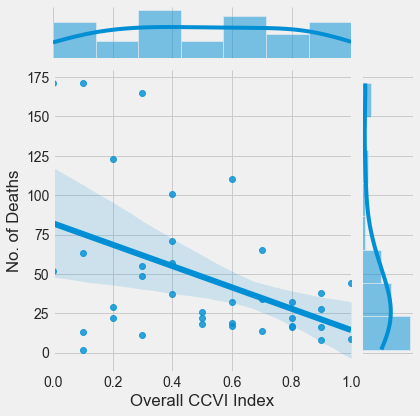

In [58]:
sns.jointplot(x='Overall CCVI Index', y='No. of Deaths', data=nig_covid_ext, kind='reg')

<Figure size 432x288 with 0 Axes>

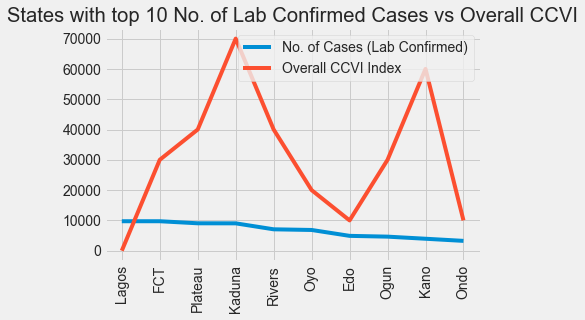

<Figure size 432x288 with 0 Axes>

In [59]:
# line plot of top 10 confirmed cases and overall CCVI

# returns the top 10 largest rows in dataframe by No. of Cases (Lab Confirmed)
nig_covid_ext_larg=nig_covid_ext.nlargest(10, 'No. of Cases (Lab Confirmed)')

x=nig_covid_ext_larg['States']

y1 = nig_covid_ext_larg['No. of Cases (Lab Confirmed)']

y2 = nig_covid_ext_larg['Overall CCVI Index'] 

plt.plot(x, y1, x, 100000*y2)

plt.legend(['No. of Cases (Lab Confirmed)', 'Overall CCVI Index'])

plt.xticks(rotation=90)

plt.title('States with top 10 No. of Lab Confirmed Cases vs Overall CCVI')

plt.figure()

<Figure size 432x288 with 0 Axes>

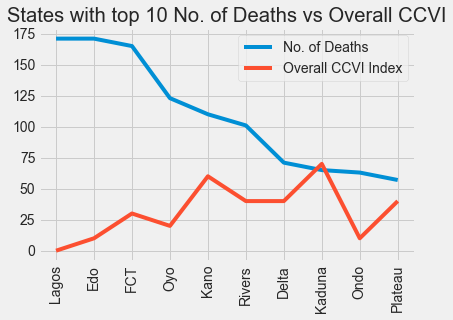

<Figure size 432x288 with 0 Axes>

In [60]:
# line plot of top 10 states with largest deaths and overall CCVI

# returns the top 10 largest rows in dataframe by No. of deaths
nig_covid_ext_larg=nig_covid_ext.nlargest(10, 'No. of Deaths')

x=nig_covid_ext_larg['States']

y1 = nig_covid_ext_larg['No. of Deaths']

y2 = nig_covid_ext_larg['Overall CCVI Index'] 

plt.plot(x, y1, x, 100*y2)

plt.legend(['No. of Deaths', 'Overall CCVI Index'])

plt.xticks(rotation=90)

plt.title('States with top 10 No. of Deaths vs Overall CCVI')

plt.figure()

### TO DO J-

I will Determine the relationship between the external dataset and the NCDC COVID-19 data 

    i. I will determine the relationship between No. of Lab confirmed Cases and Population 
    ii. I will determine the relationship between No. of Lab confirmed Cases and Population Density
    

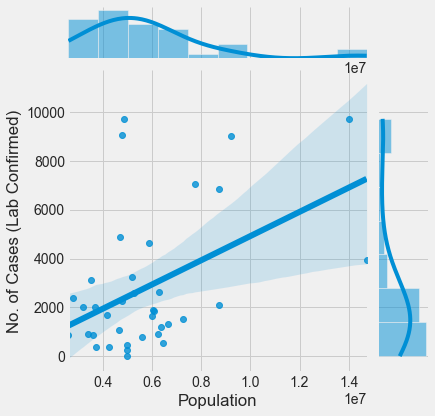

In [61]:
sns.jointplot(y='No. of Cases (Lab Confirmed)', x='Population', data=nig_covid_ext, kind='reg')

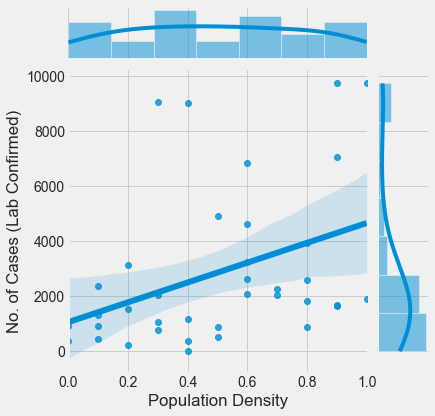

In [62]:
sns.jointplot(y='No. of Cases (Lab Confirmed)', x='Population Density', data=nig_covid_ext, kind='reg')

### TO DO K-

I will determine the relationship between No. Deaths and Population

I will determine the relationship between No. Deaths and Population Density

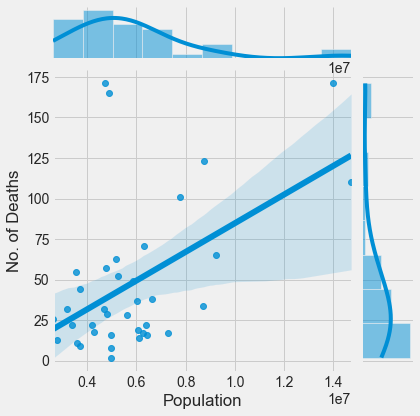

In [63]:
sns.jointplot(y='No. of Deaths', x='Population', data=nig_covid_ext, kind='reg')

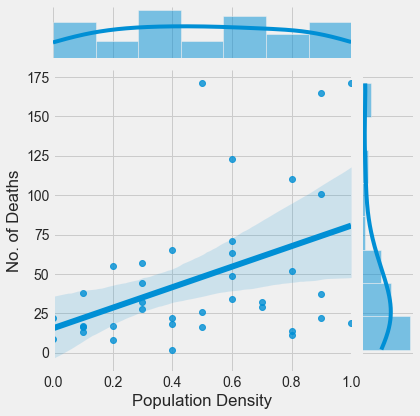

In [64]:
sns.jointplot(y='No. of Deaths', x='Population Density', data=nig_covid_ext, kind='reg')

### TODO L-
I will Determine the effect of the Pandemic on the economy by comparing the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)

In [65]:
realgdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


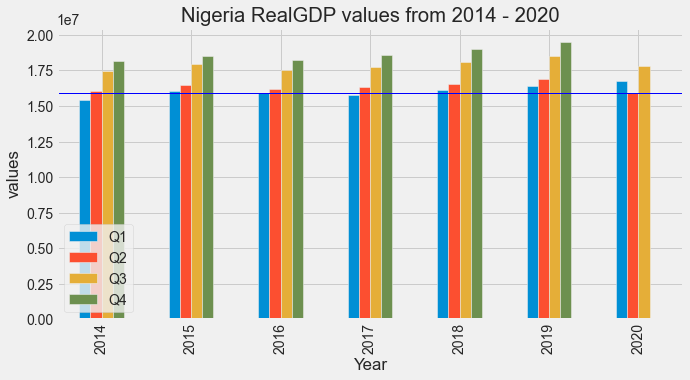

In [66]:
realgdp.plot.bar(x='Year', figsize=(10,5))
plt.xlabel('Year')
plt.ylabel('values')
plt.title('Nigeria RealGDP values from 2014 - 2020')
plt.legend(loc='lower left')
plt.axhline(y=15890000, xmin=0, xmax=2020, linewidth=1, color='b')
plt.show()

### TO DO M -

I will Determine the effect of the Pandemic on states Budget Allocation by determining the relationship between the CCVI data of external data set and budget reduction in top 10 states with greatest and smallest budget reduction. 

I will also determine the mean CCVI index and budget reduction in top 10 states with greatest and smallest budget reduction. 

In [67]:
# create a new column in Nig_budget and compute the difference between initial and revised budgets
budget_data['Budget reduction'] = (budget_data['Initial_budget (Bn)'] - budget_data['Revised_budget (Bn)'])

# merge Budget data with covid_ext 
nig_budget=pd.merge(covid_ext, budget_data, how='inner', on=['States'])

# returns top 10 states with the largest budget reduction
nl=nig_budget.nlargest(10, 'Budget reduction')

# returns top 10 states with the smallest budget reduction
ns=nig_budget.nsmallest(10, 'Budget reduction')


In [68]:
nl.head()

,States,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn),Budget reduction
30,Cross River,South South,4272000,0.5,0.4,0.7,0.8,0.1,0.4,0.4,0.6,0.98,1100.00,147.1,952.90
31,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,1680.00,920.5,759.50
23,Akwa Ibom,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01,597.73,366.0,231.73
26,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,530.80,300.4,230.40
33,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,449.90,280.0,169.90


Text(0.5, 1.0, 'Top 10 States with the Highest Budget Reduction')

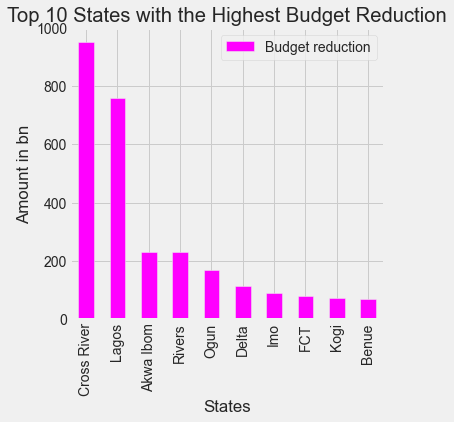

In [69]:
nl.plot.bar(x='States', y='Budget reduction', figsize=(5,5), color='magenta')
plt.ylabel('Amount in bn')
plt.title('Top 10 States with the Highest Budget Reduction')

In [70]:
ns.head()

,States,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn),Budget reduction
11,Yobe,North East,3723000,1.0,0.6,0.3,1.0,0.5,0.0,0.9,1.0,0.87,108.00,86.0,22.00
22,Enugu,South East,4801000,0.2,0.9,0.4,0.0,0.3,0.7,0.4,0.1,1.14,169.56,146.4,23.16
8,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,130.83,107.4,23.43
24,Anambra,South East,6050000,0.6,0.9,1.0,0.6,0.2,1.0,0.0,0.1,1.08,137.10,112.8,24.30
16,Jigawa,North West,6435000,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92,152.92,124.0,28.92


Text(0.5, 1.0, 'Top 10 States with the Lowest Budget Reduction')

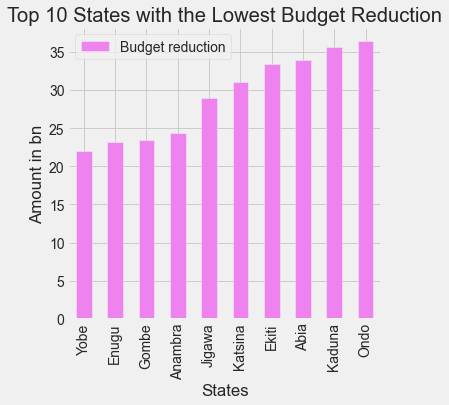

In [71]:
ns.plot.bar(x='States', y='Budget reduction', figsize=(5,5), color='violet')
plt.ylabel('Amount in bn')
plt.title('Top 10 States with the Lowest Budget Reduction')

In [72]:
# mean CCVI of top 10 largest budget reduction states
n1=nl['Overall CCVI Index'].mean()
print ('The mean CCVI of the top 10 states with largest budget reduction is', n1)

# mean Budget reduction of top 10 largest budget reduction states
n2=nl['Budget reduction'].mean()
print ('The mean budget reduction of the top 10 states with largest budget reduction is', n2, 'bn')

The mean CCVI of the top 10 states with largest budget reduction is 0.36
The mean budget reduction of the top 10 states with largest budget reduction is 277.071 bn


In [73]:
# mean CCVI of top 10 smallest budget reduction states
ns1=ns['Overall CCVI Index'].mean()
print ('The mean CCVI of the top 10 states with smallest budget reduction is', ns1)

# mean Budget reduction of top 10 smallest budget reduction states
ns2=ns['Budget reduction'].mean()
print ('The mean budget reduction of the top 10 states with smallest budget reduction is', ns2, 'bn')

The mean CCVI of the top 10 states with smallest budget reduction is 0.5700000000000001
The mean budget reduction of the top 10 states with smallest budget reduction is 29.216 bn


Text(0.5, 1.0, 'Reg Plot of Largest Budget reduction vs CCVI')

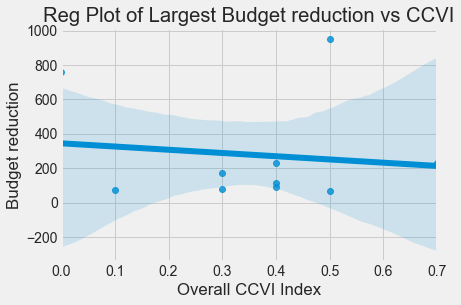

In [74]:
# determine the relationship between large budget reduction and CCVI
sns.regplot(y='Budget reduction', x='Overall CCVI Index', data=nl)
plt.title('Reg Plot of Largest Budget reduction vs CCVI')

NB: the regplot above shows very low linear relationship and may be due to presence of outlier values
check budget reduction in states like Lagos and Cross River.

In [75]:
# drop lagos and cross river
nl=nl.drop([30,31])
nl.head()

,States,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Initial_budget (Bn),Revised_budget (Bn),Budget reduction
23,Akwa Ibom,South East,6093000,0.7,0.8,0.7,0.6,0.8,0.8,0.5,0.1,1.01,597.73,366.0,231.73
26,Rivers,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00,530.80,300.4,230.40
33,Ogun,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07,449.90,280.0,169.90
27,Delta,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08,395.50,282.3,113.20
20,Imo,South East,6018000,0.4,1.0,0.9,0.0,0.4,0.9,0.4,0.0,1.12,197.60,108.3,89.30


Text(0.5, 1.0, 'Reg Plot of Largest Budget reduction vs Overall CCVI')

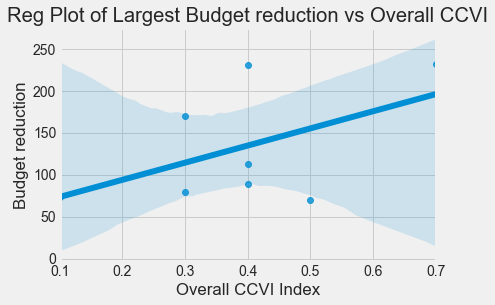

In [76]:
sns.regplot(y='Budget reduction', x='Overall CCVI Index', data=nl)
plt.title('Reg Plot of Largest Budget reduction vs Overall CCVI')

Text(0.5, 1.0, 'Reg Plot of Lowest Budget reduction vs Overall CCVI')

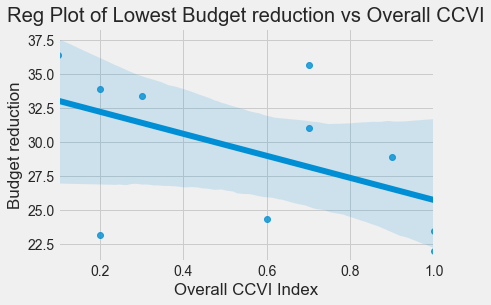

In [77]:
# determine the relationship between small budget reduction and CCVI
sns.regplot(y='Budget reduction', x='Overall CCVI Index', data=ns)
plt.title('Reg Plot of Lowest Budget reduction vs Overall CCVI')

### TO DO N -

i will determine the effect of the pandemic on state revenue for top 10 states with largest revenue and top 10 states with
the least revenue

i will also determine the percentage reduction in revenue in all the states and plot a bar graph to describe the data

In [78]:
state_revenue_2020.head()

,STATE,Q1,Q2
0,Abia,426508998230,192362572980
1,Adamawa,162625411559,212414228299
2,Akwa Ibom,1195442838643,425656592184
3,Anambra,453338346079,501332872190
4,Bauchi,438504096509,136724679263


In [79]:
sr_largest=state_revenue_2020.nlargest(10, 'Q1')

sr_smallest=state_revenue_2020.nsmallest(10, 'Q1')

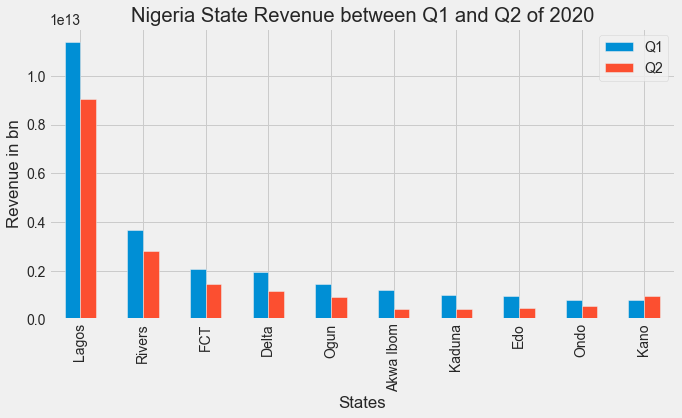

In [80]:
sr_largest.plot.bar(x='STATE', figsize=(10,5))
plt.xlabel('States')
plt.ylabel('Revenue in bn')
plt.title('Nigeria State Revenue between Q1 and Q2 of 2020')
plt.legend(loc='upper right')
plt.show()

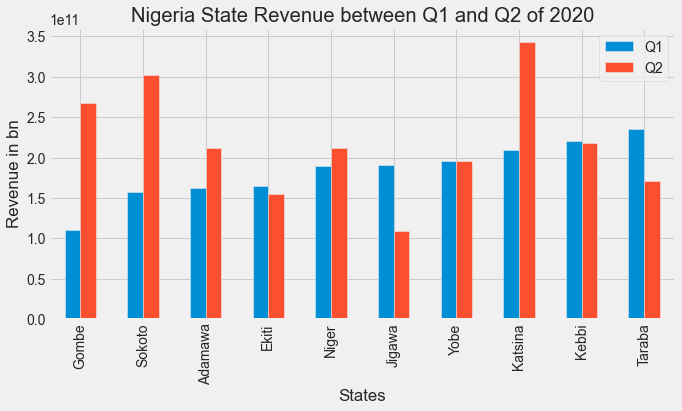

In [81]:
sr_smallest.plot.bar(x='STATE', figsize=(10,5))
plt.xlabel('States')
plt.ylabel('Revenue in bn')
plt.title('Nigeria State Revenue between Q1 and Q2 of 2020')
plt.legend(loc='upper right')
plt.show()

In [82]:
state_revenue_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STATE   37 non-null     object
 1   Q1      37 non-null     int64 
 2   Q2      37 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [83]:
state_revenue_2020['% change in revenue'] = ((state_revenue_2020['Q2'] - state_revenue_2020['Q1']) / state_revenue_2020['Q1']) * 100

In [84]:
state_revenue_2020

,STATE,Q1,Q2,% change in revenue
0,Abia,426508998230,192362572980,-54.898355
1,Adamawa,162625411559,212414228299,30.615644
2,Akwa Ibom,1195442838643,425656592184,-64.393396
3,Anambra,453338346079,501332872190,10.586911
4,Bauchi,438504096509,136724679263,-68.820205
5,Bayelsa,287532191900,251094725200,-12.672482
6,Benue,361845443793,172719049458,-52.267176
7,Borno,358856502667,179057543600,-50.103302
8,Cross River,398795121099,406273536659,1.875253
9,Delta,1930729850390,1153498693577,-40.255821


In [85]:
state_revenue_2020_sorted=state_revenue_2020.sort_values(by=['% change in revenue'], ascending= False, ignore_index=True)

In [86]:
state_revenue_2020_sorted

,STATE,Q1,Q2,% change in revenue
0,Gombe,110555255589,268239787593,142.629612
1,Sokoto,158068473787,301705202597,90.869941
2,Katsina,210036823800,343645509000,63.612029
3,Imo,308485622695,464733250350,50.649890
4,Oyo,735443695667,1041915458232,41.671683
5,Adamawa,162625411559,212414228299,30.615644
6,Kano,784961602954,965981417539,23.060977
7,Niger,189879016112,211910050473,11.602669
8,Anambra,453338346079,501332872190,10.586911
9,Enugu,595310753900,630929759500,5.983263


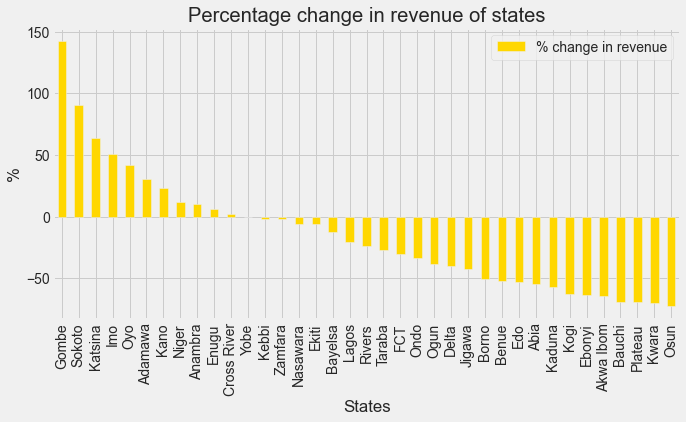

In [87]:
state_revenue_2020_sorted.plot.bar(x='STATE', y='% change in revenue', figsize=(10,5), color='Gold')
plt.xlabel('States')
plt.ylabel('%')
plt.title('Percentage change in revenue of states')
plt.legend(loc='upper right')

plt.show()